In [2]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
!pip install imutils

You should consider upgrading via the 'c:\users\21smt17\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\21smt17\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
#-*- coding:utf-8-*-
import imutils
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tqdm import tqdm

In [4]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

In [8]:
def draw_styled_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
#                              mp_drawing.DrawingSpec(color=(80,265,121), thickness=1,circle_radius=1)
#                              ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2,circle_radius=2)) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2,circle_radius=2)) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,6), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2,circle_radius=2))

In [16]:
import cv2
#cap = cv2.VideoCapture(0)
# for i in range(0,3):
cap = cv2.VideoCapture("./img/NIA_SL_WORD2751_REAL01_F.mp4")
#cap = cv2.VideoCapture("./img/T1.mp4")
#cap = cv2.VideoCapture(0)
# for i in range(0,2,1):
#     cap = cv2.VideoCapture("./img/KETI_SL_000000000"+"{}.avi".format(i + 2))
    
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
    
        # Read feed        
        ret, frame = cap.read()
        #frame = imutils.resize(frame, width=1200)
#         if not ret:
#             print("비디오 읽기 실패 / 비디오 모두 읽음")
#             cap.release()   # 비디오 읽기 종료
#             cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
#             break
        # Make detections(탐지들)
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [15]:
cap.release()
cv2.destroyAllWindows()

In [17]:
#results.left_hand_landmarks.landmark
len(results.right_hand_landmarks.landmark)

21

In [18]:
print(draw_landmarks(frame, results))

None


In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [10]:
#test
#pose
#len(pose)
#pose = np.array([[res.x, res.y, res.z, res.visibility(저항)] for res in results.pose_landmarks.landmark])
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)                                                                                                   # 학습시킬려고 flatten으로 쫙 펴줌
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [57]:
def extract_keypoints(results):
   pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)                                                                                                   # 학습시킬려고 flatten으로 쫙 펴줌
   lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
   rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) 
   return np.concatenate([pose, lh, rh])

In [22]:
# len(results.face_landmarks.landmark) * 3

In [23]:
lh

array([ 7.87624180e-01,  5.90588450e-01, -1.27639378e-05,  7.32757986e-01,
        5.63510776e-01, -2.18620580e-02,  6.96821928e-01,  4.99367177e-01,
       -2.80388817e-02,  6.79750443e-01,  4.44291949e-01, -3.68351899e-02,
        6.61758244e-01,  4.09160078e-01, -4.73118275e-02,  7.32539117e-01,
        4.13816422e-01, -2.62080715e-03,  7.15683818e-01,  3.48913789e-01,
       -1.35451937e-02,  7.08856881e-01,  3.08455646e-01, -2.92565413e-02,
        7.04533815e-01,  2.71846175e-01, -4.13230211e-02,  7.67735243e-01,
        4.03414756e-01, -6.68242434e-03,  7.65343547e-01,  3.27461600e-01,
       -7.06402212e-03,  7.64405072e-01,  2.82331020e-01, -2.58288998e-02,
        7.64607012e-01,  2.42570475e-01, -4.26378474e-02,  8.00397635e-01,
        4.11205709e-01, -1.57206282e-02,  8.04747045e-01,  3.38915735e-01,
       -2.34648623e-02,  8.08072507e-01,  2.93832213e-01, -4.60261703e-02,
        8.11098933e-01,  2.54201174e-01, -6.53683841e-02,  8.32200646e-01,
        4.34135377e-01, -

In [24]:
rh

array([ 2.48925254e-01,  5.37759066e-01, -6.20893406e-05,  2.96656460e-01,
        5.11519849e-01, -1.41496677e-02,  3.31023455e-01,  4.44971025e-01,
       -1.74512174e-02,  3.46047491e-01,  3.89703631e-01, -2.43842304e-02,
        3.61301988e-01,  3.54035109e-01, -3.08846217e-02,  2.92173713e-01,
        3.59226912e-01,  4.01701033e-03,  3.06869388e-01,  2.97041684e-01,
       -8.21058080e-03,  3.14848453e-01,  2.59150952e-01, -1.39177172e-02,
        3.20684433e-01,  2.23777384e-01, -1.69139933e-02,  2.60454178e-01,
        3.50561589e-01, -2.83411238e-03,  2.64055759e-01,  2.81485975e-01,
       -1.26298349e-02,  2.66730905e-01,  2.37022266e-01, -2.14153882e-02,
        2.70159036e-01,  1.99702352e-01, -2.79093646e-02,  2.31591225e-01,
        3.57781678e-01, -1.56562105e-02,  2.27402925e-01,  2.90376872e-01,
       -2.97476016e-02,  2.25016832e-01,  2.44542018e-01, -4.23591547e-02,
        2.26317734e-01,  2.04151556e-01, -5.18308319e-02,  2.03081071e-01,
        3.81299734e-01, -

In [25]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
#extract_keypoints(results).shape
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 4.81343031e-01,  3.27566653e-01, -7.51166224e-01,  9.99939740e-01,
        4.99387085e-01,  2.64320821e-01, -7.33469605e-01,  9.99800563e-01,
        5.12962699e-01,  2.61591166e-01, -7.32538760e-01,  9.99847114e-01,
        5.27027607e-01,  2.58902639e-01, -7.32432008e-01,  9.99776840e-01,
        4.62890327e-01,  2.75043547e-01, -7.10544765e-01,  9.99767244e-01,
        4.49713558e-01,  2.79371083e-01, -7.11447179e-01,  9.99815404e-01,
        4.34669316e-01,  2.83112168e-01, -7.11935639e-01,  9.99744952e-01,
        5.59696496e-01,  2.81309515e-01, -4.48252439e-01,  9.99887586e-01,
        4.25332159e-01,  3.07427466e-01, -3.44777316e-01,  9.99880731e-01,
        5.19158959e-01,  3.91484946e-01, -6.32072628e-01,  9.99883354e-01,
        4.69446748e-01,  4.04630661e-01, -6.02522194e-01,  9.99906778e-01,
        7.07498848e-01,  5.71144879e-01, -2.20750213e-01,  9.99823749e-01,
        3.28724980e-01,  5.75886488e-01, -1.28167927e-01,  9.99811471e-01,
        8.41926217e-01,  

In [28]:
468*3+33*4+21*3+21*3

1662

In [11]:
# 딥러닝 파일에 0.npy 파일 생김   test용
np.save('0', result_test) 

NameError: name 'result_test' is not defined

In [18]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('수어테스트1')

# Actions that we try to detect
#actions = np.array(['coco','love','HM'])
#actions = np.array(['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12'])
actions = np.array(['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요'])
# Thirty videos worth of data
no_sequences =  20#60#10      #29 , 16, 5

# videos are going to be 30 frames in length
sequence_length = 40#40#50    #30, 20, 100

In [98]:
# 폴더 세개 생성!! 딥러닝 -> 안녕, 나는, 아가형민 순서대로 생김
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass

In [99]:
cap=cv2.VideoCapture(0)    
    # Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     for action in actions:        
    # New Loop
    # Loop through actions
        

        # Loop through sequences aka videos

    for action in actions:
        for i in range(0,20,1):        
            for frame_num in range(sequence_length):                

                # read feed
                ret, frame = cap.read()
                #frame = imutils.resize(frame, width=800)
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
    #                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STRATING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number{} f_num{}'.format(action, i,frame_num), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        # show to screen

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000) # 1000

                else : 
                    cv2.putText(image, 'Collecting frames for {} Video Number{} f_num{}'.format(action, i, frame_num), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        # show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(i), str(frame_num))
                np.save(npy_path, keypoints)
                #count = count+1
    #                # 중간에 파일이 없어도 끊기지 않게
    #                for i in range(0,sequence_length):
    #                    if os.path.isfile('C:/Users/21SMT37/3차 프젝/MP_Data/3차/8/{}.npy'.format(i)):
    #                        pass
    #                    else : 
    #                        continue

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
#         cap.release()
#         cv2.destroyAllWindows()
cap.release()
cv2.destroyAllWindows()

In [100]:
cap.release()
cv2.destroyAllWindows()

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
from PIL import ImageFont, ImageDraw, Image

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'감사합니다': 0, '귀여워요': 1, '괜찮아요': 2, '미안합니다': 3, '기다려요': 4}

In [23]:
frame_num

NameError: name 'frame_num' is not defined

In [24]:
sequences, labels = [], []
for action in actions :
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
X = np.array(sequences)

In [26]:
y = to_categorical(labels).astype(int)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, Dropout, TimeDistributed, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [29]:
log_dir = os.path.join("Test!2")
tb_callback = TensorBoard(log_dir=log_dir)

In [30]:
X.shape

(100, 40, 258)

In [33]:
md = Sequential()
md.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(40,258)))
md.add(LSTM(64, return_sequences=True, activation='tanh'))
md.add(LSTM(32, return_sequences=False, activation='tanh'))
md.add(Dense(64, activation='tanh'))
md.add(Dense(32, activation='tanh'))
md.add(Dense(actions.shape[0], activation='softmax'))

In [114]:
X_train.shape, y_train.shape

((80, 40, 258), (80, 5))

In [115]:
#Adam(lr=0.0001)    #categorical_crossentropy : 이진 교차 엔트로피
md.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
           metrics=['categorical_accuracy']) # categorical_accuracy

In [116]:
h = md.fit(X_train, y_train, batch_size=128,
         epochs = 300, callbacks=[tb_callback]) # tensorboard_callback

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 1.6481 - categorical_accuracy: 0.2000
Epoch 2/300
1/1 [==============================] - 0s 460ms/step - loss: 1.6285 - categorical_accuracy: 0.2000
Epoch 3/300
1/1 [==============================] - 0s 65ms/step - loss: 1.6111 - categorical_accuracy: 0.2000
Epoch 4/300
1/1 [==============================] - 0s 65ms/step - loss: 1.5952 - categorical_accuracy: 0.2000
Epoch 5/300
1/1 [==============================] - 0s 66ms/step - loss: 1.5804 - categorical_accuracy: 0.2000
Epoch 6/300
1/1 [==============================] - 0s 67ms/step - loss: 1.5663 - categorical_accuracy: 0.2000
Epoch 7/300
1/1 [==============================] - 0s 65ms/step - loss: 1.5524 - categorical_accuracy: 0.2000
Epoch 8/300
1/1 [==============================] - 0s 66ms/step - loss: 1.5384 - categorical_accuracy: 0.2000
Epoch 9/300
1/1 [==============================] - 0s 66ms/step - loss: 1.5242 - categorical_accuracy: 0.5000
Epoch 10/30

1/1 [==============================] - 0s 72ms/step - loss: 0.1096 - categorical_accuracy: 1.0000
Epoch 148/300
1/1 [==============================] - 0s 72ms/step - loss: 0.1085 - categorical_accuracy: 1.0000
Epoch 149/300
1/1 [==============================] - 0s 71ms/step - loss: 0.1075 - categorical_accuracy: 1.0000
Epoch 150/300
1/1 [==============================] - 0s 70ms/step - loss: 0.1064 - categorical_accuracy: 1.0000
Epoch 151/300
1/1 [==============================] - 0s 67ms/step - loss: 0.1054 - categorical_accuracy: 1.0000
Epoch 152/300
1/1 [==============================] - 0s 69ms/step - loss: 0.1044 - categorical_accuracy: 1.0000
Epoch 153/300
1/1 [==============================] - 0s 69ms/step - loss: 0.1034 - categorical_accuracy: 1.0000
Epoch 154/300
1/1 [==============================] - 0s 70ms/step - loss: 0.1024 - categorical_accuracy: 1.0000
Epoch 155/300
1/1 [==============================] - 0s 73ms/step - loss: 0.1015 - categorical_accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 75ms/step - loss: 0.0418 - categorical_accuracy: 1.0000
Epoch 294/300
1/1 [==============================] - 0s 68ms/step - loss: 0.0416 - categorical_accuracy: 1.0000
Epoch 295/300
1/1 [==============================] - 0s 71ms/step - loss: 0.0414 - categorical_accuracy: 1.0000
Epoch 296/300
1/1 [==============================] - 0s 72ms/step - loss: 0.0413 - categorical_accuracy: 1.0000
Epoch 297/300
1/1 [==============================] - 0s 73ms/step - loss: 0.0411 - categorical_accuracy: 1.0000
Epoch 298/300
1/1 [==============================] - 0s 71ms/step - loss: 0.0409 - categorical_accuracy: 1.0000
Epoch 299/300
1/1 [==============================] - 0s 75ms/step - loss: 0.0407 - categorical_accuracy: 1.0000
Epoch 300/300
1/1 [==============================] - 0s 70ms/step - loss: 0.0405 - categorical_accuracy: 1.0000


In [117]:
md.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 128)           198144    
_________________________________________________________________
lstm_4 (LSTM)                (None, 40, 64)            49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 264,325
Trainable params: 264,325
Non-trainable params: 0
________________________________________________

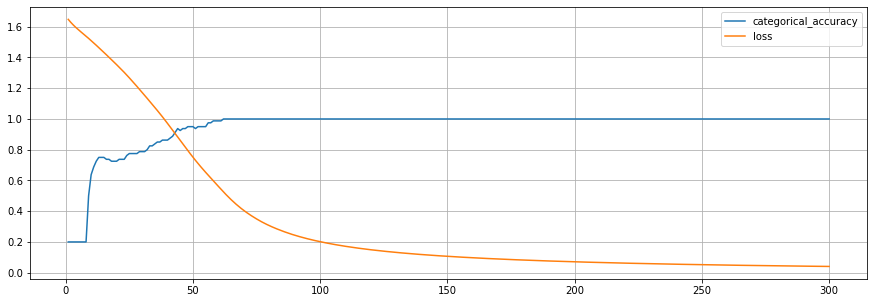

In [118]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 301, 1),
         h.history['categorical_accuracy'],
         label='categorical_accuracy'
         )

plt.plot(range(1, 301, 1),
         h.history['loss'],
         label='loss'
         )
plt.grid()
plt.legend()
plt.show()

In [34]:
res = md.predict(X_test)

In [46]:
actions[np.argmax(res[8])]

'괜찮아요'

In [47]:
actions[np.argmax(y_test[8])]

'감사합니다'

In [141]:
md.save('Test1.h5')  # 모델 저장

In [48]:
md.load_weights('Test1.h5')  # 모델 저장

In [49]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score 

In [50]:
yhat = md.predict(X_train)

In [51]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[64,  0],
        [ 0, 16]],

       [[62,  1],
        [ 0, 17]],

       [[62,  0],
        [ 3, 15]],

       [[65,  1],
        [ 0, 14]],

       [[63,  2],
        [ 1, 14]]], dtype=int64)

In [53]:
accuracy_score(ytrue, yhat)

0.95

In [54]:
md.evaluate(X_test, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [55]:
colors = [(245,117,16),(117,245,16),(16,117,245),(245,117,16),(117,245,16)]
# ,(245,117,16),(117,245,16),(16,117,245),(245,117,16)
#          ,(117,245,16),(16,117,245),(245,117,16),(117,245,16),(16,117,245)
def prob_viz(res,actions,input_frame,colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
        cv2.putText(output_frame, actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,
                    (255,255,255),2,cv2.LINE_AA)
        
    return output_frame

In [149]:
# # -*- coding : utf-8 -*-
# import sys
# print(sys.getdefaultencoding())

In [80]:
# -*- coding : utf-8 -*-
import cv2
from PIL import ImageFont, ImageDraw, Image  # 한글 출력 임포트
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7
predictions = []

def most_frequent(data):
    return max(data, key=data.count)
cnt = 0
result_actions = 0

word=['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요']
b,g,r,a = 0,0,0,10
fontpath = "fonts/gulim.ttc"
font = ImageFont.truetype(fontpath, 40)

cap = cv2.VideoCapture("./img/A1.mp4")
#cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
    while cap.isOpened():
    
        # read feed
        
        ret, frame = cap.read()
        frame = imutils.resize(frame, width=800)
        if not ret:
            #print("비디오 읽기 실패 / 비디오 모두 읽음")
            print("Finish")
            cap.release()   # 비디오 읽기 종료
            cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
            break
            
        # Make detections
        image, results = mediapipe_detection(frame,holistic)
#         print(results)
        
#         image = Image.fromarray(image)
#         draw = ImageDraw.Draw(image)
#         draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))
#         image=np.array(image)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        
        #2. Prediction logic
        keypoints = extract_keypoints(results)
#        sequence.insert(0,keypoints)
#        sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-40:]
        
        label = actions[np.argmax(res)]
        if len(sequence) == 40 :  # 30 프레임 
                 #np.expand_dims : (s_num,50,1662)을 캡슐화
            res = md.predict(np.expand_dims(sequence, axis=0))[0]            
#            print(actions[np.argmax(res)])
#            predictions.append(np.argmax(res))
        
# # # #         # 3. Viz logic
#         if np.unique(predictions[:10]) ==np.argmax(res): 
        
        if res[np.argmax(res)] > threshold: # 정확도                
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
#                     print(actions[np.argmax(res)])
            else :                               
                sentence.append(actions[np.argmax(res)])

#         if len(sentence) > 2 : #화면출력 글자 수
#             sentence = sentence[-2:]
#                 #draw.text(xy=(10,15), text=sentence, font=font, fill=(255,255,255))
#     #         # VIz probabilities
# #        image = prob_viz(res, actions, image, colors)
#     #         draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))  
#         cv2.rectangle(image, (0,0), (640,40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30),
#                     cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2, cv2.LINE_AA)
#         if result_actions == label:            
#             cnt += 1
# #         elif result_actions != label:
# #             cnt = 0
        
#         result_actions = "귀여워요"
#         if cnt >= 15:
#             #print(result_actions)
            draw.text((10, 10), actions[np.argmax(res)] , font=font, fill=(b,g,r,a))
            image = np.array(img_pil)
            
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) == 27:
            break
            
        
    #print(actions[np.argmax(res)])
#     def most_frequent(data):
#         count_list=[]

#         for x in data: 
#             count_list.append(data.count(x))
 
#         return data[count_list.index(max(count_list))]

#     print(most_frequent(sequence))
    cap.release()
    cv2.destroyAllWindows()
    print(most_frequent(sentence))

AttributeError: 'NoneType' object has no attribute 'shape'

In [81]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
actions[np.argmax(res)]

In [ ]:
md.predict(np.expand_dims(sequence, axis=0)[0])

In [ ]:
np.expand_dims(sequence, axis=0)[0]